**Import library**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import tree
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score
from graphviz import Digraph

**Load Dataset**

In [ ]:
import pandas as pd

columns = [
    'class','cap-shape','cap-surface','cap-color','bruises','odor',
    'gill-attachment','gill-spacing','gill-size','gill-color',
    'stalk-shape','stalk-root','stalk-surface-above-ring',
    'stalk-surface-below-ring','stalk-color-above-ring',
    'stalk-color-below-ring','veil-type','veil-color','ring-number',
    'ring-type','spore-print-color','population','habitat'
]

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"

df = pd.read_csv(url, header=None, names=columns)

print(df.head())
print(df.shape)


  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1       

**Basic Inspection**

In [ ]:
df.head()
df.info()
df['class'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

,count
class,
e,4208
p,3916


In [ ]:
df.shape


(8124, 23)

In [ ]:
df.describe(include="all").T


,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


**Missing Value**

In [ ]:
df.isin(['?']).sum()


,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


**Target Distribution**

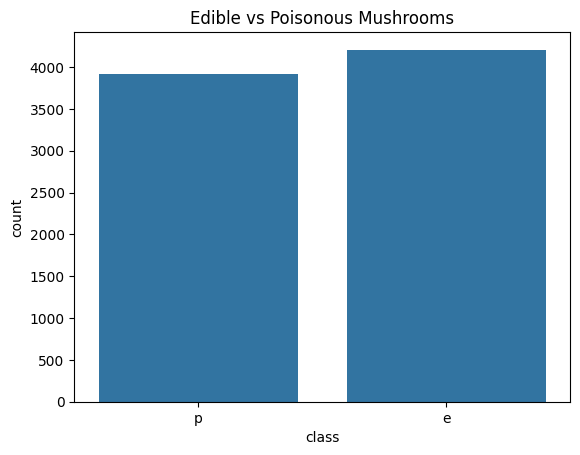

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='class', data=df)
plt.title("Edible vs Poisonous Mushrooms")
plt.show()


**Feature Insight (Odor vs Class)**

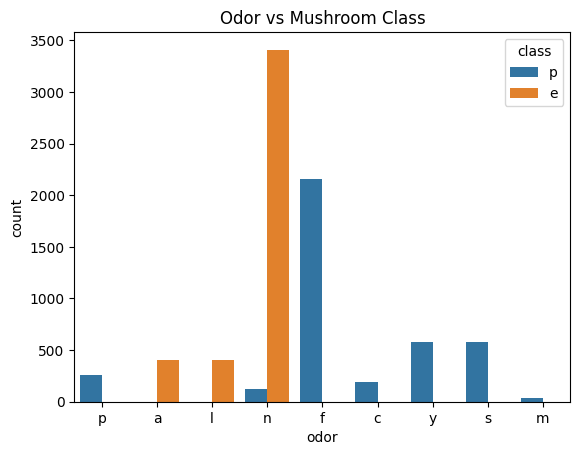

In [ ]:
sns.countplot(x='odor', hue='class', data=df)
plt.title("Odor vs Mushroom Class")
plt.show()


**Data Preprocessing**

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])


**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

y_pred_dt = dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred_dt)

print("Decision Tree Accuracy:", dt_accuracy)


Decision Tree Accuracy: 1.0


**Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_list = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n in n_estimators_list:
    rf = RandomForestClassifier(
        n_estimators=n, random_state=42
    )
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rf_accuracies.append(acc)
    print(f"n_estimators={n}, Accuracy={acc}")


n_estimators=1, Accuracy=1.0
n_estimators=50, Accuracy=1.0
n_estimators=100, Accuracy=1.0
n_estimators=150, Accuracy=1.0
n_estimators=200, Accuracy=1.0
n_estimators=250, Accuracy=1.0


**Accuracy Trend Plot**

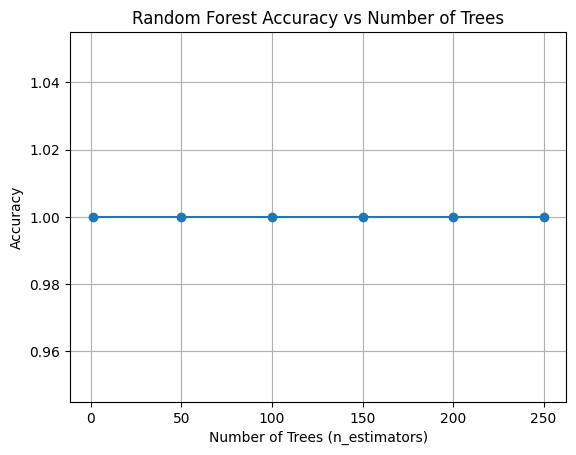

In [ ]:
plt.plot(n_estimators_list, rf_accuracies, marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Accuracy")
plt.title("Random Forest Accuracy vs Number of Trees")
plt.grid()
plt.show()
